## MM

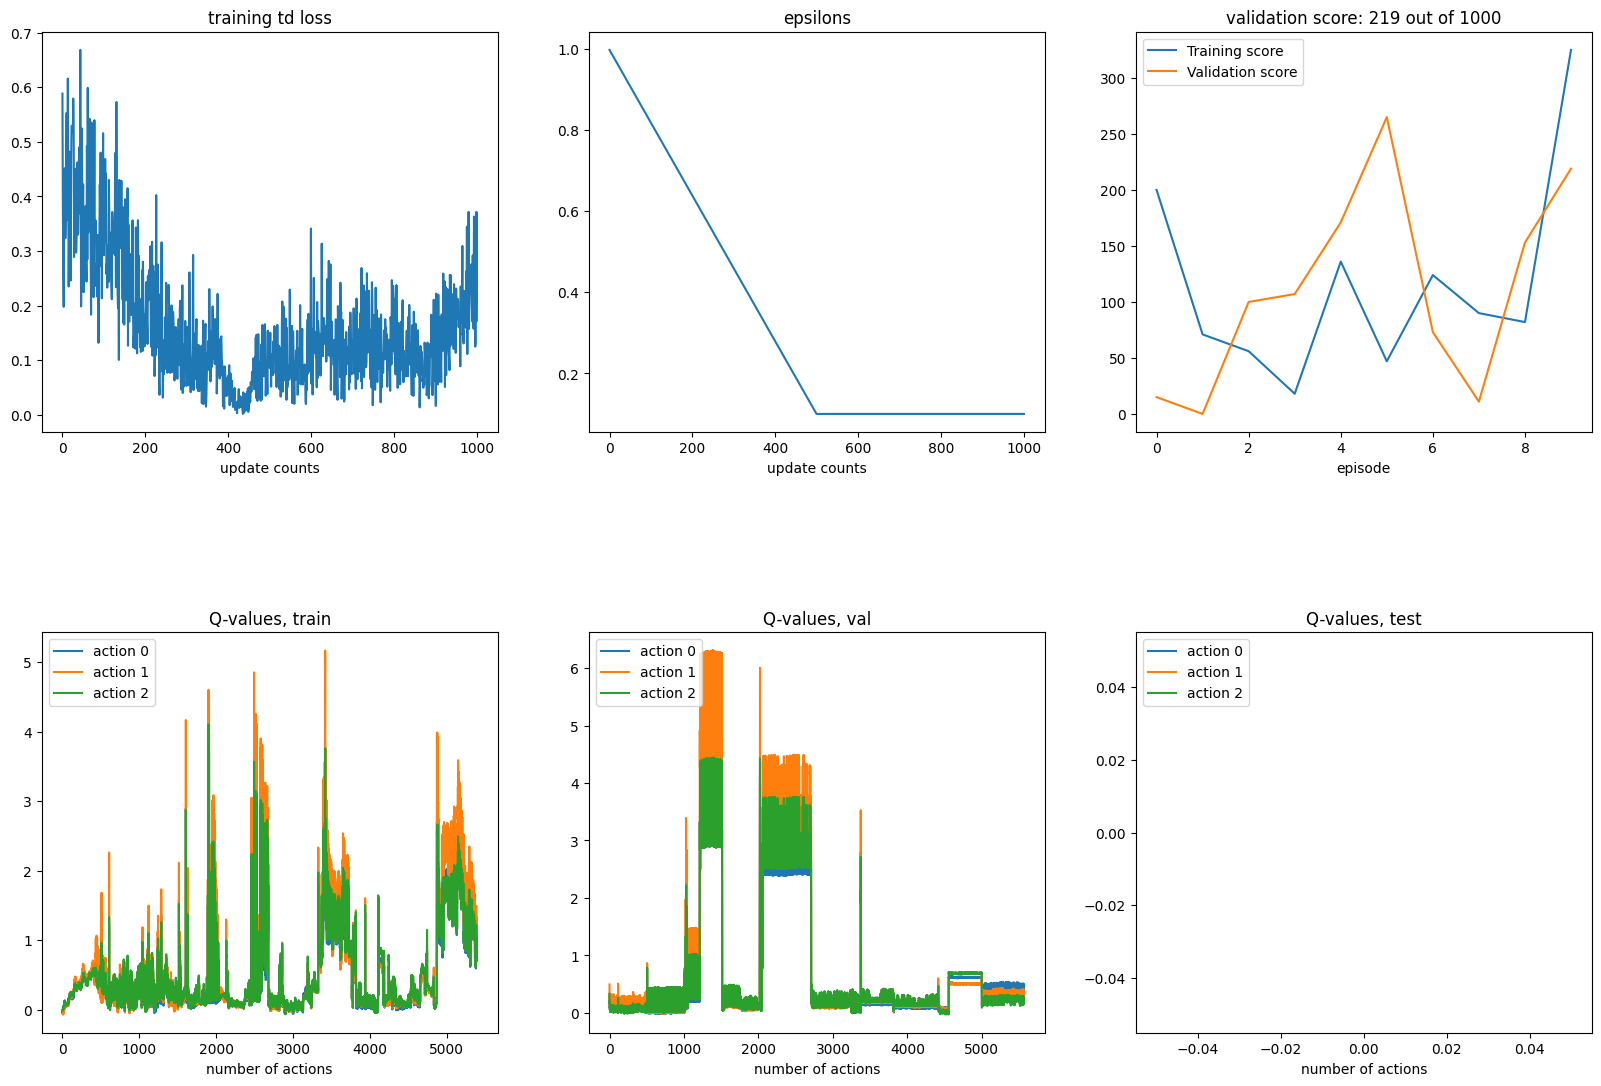

/home/tk/.virtualenvs/human-memory/lib/python3.10/site-packages/gymnasium/utils/passive_env_checker.py:168: DeprecationWarning: WARN: Current gymnasium version requires that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.deprecation(
/home/tk/.virtualenvs/human-memory/lib/python3.10/site-packages/gymnasium/utils/passive_env_checker.py:181: DeprecationWarning: WARN: Current gymnasium version requires that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  logger.deprecation(
/home/tk/.virtualenvs/human-memory/lib/python3.10/site-packages/gymnasium/utils/passive_env_checker.py:127: UserWarning: WARN: The obs returned by the `reset()` method should be an int or np.int64, actual type: <class 'dict'>
  logger.warn(f"{pre} should be an int or np.int64, actual type: {type(obs)}")
/home/tk/.virtualenvs/human-memory/lib/python3.10/site-packages/gymnasiu

KeyboardInterrupt: 

In [1]:
from agent import DQNMMAgent
import logging
from tqdm.auto import tqdm
import random

logger = logging.getLogger()
logger.disabled = True

params_all = []
for _ in range(1000):
    params = {
        "env_str": "room_env:RoomEnv-v2",
        "num_iterations": 100 * 10,
        "replay_buffer_size": random.choice([100 * 10 / 4, 100 * 10 / 2, 100 * 10]),
        "warm_start": random.choice([100 * 10 / 4, 100 * 10 / 2, 100 * 10]),
        "batch_size": random.choice([32, 64, 128]),
        "target_update_interval": random.choice([10, 50, 100]),
        "epsilon_decay_until": random.choice([100 * 10 / 4, 100 * 10 / 2, 100 * 10]),
        "max_epsilon": 1.0,
        "min_epsilon": 0.1,
        "gamma": random.uniform(0.7, 0.999),
        "capacity": {
            "episodic": 8,
            "episodic_agent": 0,
            "semantic": 8,
            "semantic_map": 0,
            "short": 1,
        },
        "pretrain_semantic": False,
        "nn_params": {
            "architecture": "lstm",
            "hidden_size": 64,
            "num_layers": 2,
            "embedding_dim": 64,
            "make_categorical_embeddings": False,
            "v1_params": None,
            "v2_params": {},
            "memory_of_interest": [
                "episodic",
                "semantic",
                "short",
            ],
            "fuse_information": "sum",
            "include_positional_encoding": True,
            "max_timesteps": 100,
            "max_strength": 100,
        },
        "run_test": True,
        "num_samples_for_results": 10,
        "plotting_interval": 100,
        "train_seed": 5,
        "test_seed": 0,
        "device": "cpu",
        "qa_policy": "episodic_semantic",
        "explore_policy": "avoid_walls",
        "env_config": {
            "question_prob": 1.0,
            "terminates_at": 99,
            "randomize_observations": "objects",
            "room_size": "m",
            "rewards": {"correct": 1, "wrong": 0, "partial": 0},
            "make_everything_static": False,
            "num_total_questions": 1000,
            "question_interval": 1,
            "include_walls_in_observations": True,
        },
        "ddqn": random.choice([True, False]),
        "dueling_dqn": random.choice([True, False]),
        "split_reward_training": False,
        "default_root_dir": "./training_results/DQN/mm/LSTM/m/100",
        "run_handcrafted_baselines": None,
    }
    params_all.append(params)

for params in tqdm(params_all):
    try:
        agent = DQNMMAgent(**params)
        agent.train()
    except Exception as e:
        print(e)
        continue

## Explore

In [ ]:
from agent import DQNExploreAgent
import logging
from tqdm.auto import tqdm
import random

logger = logging.getLogger()
logger.disabled = True

params_all = []
for _ in range(1000):
    params = {
        "env_str": "room_env:RoomEnv-v2",
        "num_iterations": 50 * 10,
        "replay_buffer_size": random.choice([250, 500]),
        "warm_start": random.choice([250, 500]),
        "batch_size": random.choice([8, 16, 32]),
        "target_update_interval": random.choice([10, 20, 40]),
        "epsilon_decay_until": random.choice([250, 500]),
        "max_epsilon": 1.0,
        "min_epsilon": 0.1,
        "gamma": random.uniform(0.5, 0.999),
        "capacity": {
            "episodic": 4,
            "episodic_agent": 0,
            "semantic": 4,
            "semantic_map": 0,
            "short": 1,
        },
        "pretrain_semantic": False,
        "nn_params": {
            "architecture": "lstm",
            "hidden_size": 64,
            "num_layers": 2,
            "embedding_dim": 64,
            "make_categorical_embeddings": False,
            "v1_params": None,
            "v2_params": {},
            "memory_of_interest": [
                "episodic",
                "semantic",
                "short",
            ],
            "fuse_information": "sum",
            "include_positional_encoding": True,
            "max_timesteps": 100,
            "max_strength": 100,
        },
        "run_test": True,
        "num_samples_for_results": 10,
        "train_seed": 5,
        "test_seed": 0,
        "device": "cpu",
        "mm_policy": "neural",
        "mm_agent_path": "./training_results/DQN/mm/LSTM/s/2024-03-09 10:18:32.096328/agent.pkl",
        "qa_policy": "episodic_semantic",
        "env_config": {
            "question_prob": 1.0,
            "terminates_at": 49,
            "randomize_observations": "objects",
            "room_size": "s",
            "rewards": {"correct": 1, "wrong": 0, "partial": 0},
            "make_everything_static": False,
            "num_total_questions": 1000,
            "question_interval": 1,
            "include_walls_in_observations": True,
        },
        "ddqn": False,
        "dueling_dqn": False,
        "default_root_dir": "./training_results/DQN/explore/LSTM/s",
        "run_handcrafted_baselines": False,
        "run_neural_baseline": False,
    }
    params_all.append(params)

for params in tqdm(params_all):
    try:
        agent = DQNExploreAgent(**params)
        agent.train()
    except Exception as e:
        print(e)
        continue

## DQN baselines LSTM 

In [ ]:
from agent import DQNLSTMBaselineAgent
import logging
from tqdm.auto import tqdm
import random

logger = logging.getLogger()
logger.disabled = True

params_all = []
for _ in range(1000):
    params = {
        "env_str": "room_env:RoomEnv-v2",
        "num_iterations": 20000,
        "replay_buffer_size": 20000,
        "warm_start": 2000,
        "batch_size": 32,
        "target_update_interval": 10,
        "epsilon_decay_until": 20000,
        "max_epsilon": 1.0,
        "min_epsilon": 0.1,
        "gamma": 0.9,
        "history_block_size": 24,
        "nn_params": {
            "architecture": "lstm",
            "hidden_size": 128,
            "num_layers": 2,
            "embedding_dim": 128,
            "fuse_information": "sum",
            "include_positional_encoding": True,
            "max_timesteps": 100,
            "max_strength": 100,
        },
        "run_test": True,
        "num_samples_for_results": 10,
        "train_seed": 5,
        "test_seed": 0,
        "device": "cpu",
        "env_config": {
            "question_prob": 1.0,
            "terminates_at": 99,
            "randomize_observations": "objects",
            "room_size": "l",
            "rewards": {"correct": 1, "wrong": 0, "partial": 0},
            "make_everything_static": False,
            "num_total_questions": 1000,
            "question_interval": 1,
            "include_walls_in_observations": True,
        },
        "ddqn": True,
        "dueling_dqn": True,
        "default_root_dir": "./training_results/DQN/baselines/LSTM/l",
        "run_handcrafted_baselines": True,
    }
    params_all.append(params)

for params in tqdm(params_all):
    try:
        agent = DQNLSTMBaselineAgent(**params)
        agent.train()
    except Exception as e:
        print(e)
        continue